In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataset_utils as du

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Without ChaosFEX

In [6]:
import os
x1 = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_003.npy")
x2 = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_022.npy")
X = np.append(x1, x2, axis=0)

y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
X_Test = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_041.npy")

y_Test = np.zeros(len(X_Test), dtype='int32')
y_Test = y_Test + 22
print(y_Test)


print(X.shape, y.shape, X_Test.shape, y_Test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22]
(614, 144) (614,) (46, 144) (46,)
(552, 144) (62, 144) (552,) (62,)


0.9117056032401682
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
          22       1.00      0.26      0.41        46

    accuracy                           0.26        46
   macro avg       0.50      0.13      0.21        46
weighted avg       1.00      0.26      0.41        46
 



    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


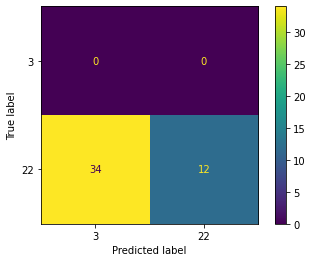

In [39]:
classifier = svm.SVC(kernel='linear')
f1 = []
for iter in range(10):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    f = metrics.f1_score(y_test, pred, pos_label=y[0])
    f1.append(f)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print(np.array(f1).sum() / len(f1))
predicted = classifier.predict(X_Test)

print("Classification report for thee classifier: %s\n %s \n" %
      (classifier, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_Test, y_Test)

In [20]:
import svm_classifier as sv
path = r"E:\DATASET\audio_CFX"
X_files = sv.get_inputs(path, ('003', '022'), 'pcdsBi', chaos=True)
f1_1, prec_1, acc_1 = sv.classify_svm_linear(path, X_files, y, thresh=0.499)

100%|██████████| 10/10 [00:03<00:00,  2.90it/s]


20 files found!
10-fold cross-validattion started for file 1 threshold: 0.499 
f1-score: 0.8383774347102776
10-fold cross-validattion started for file 2 threshold: 0.499 
f1-score: 0.8484797856399698
10-fold cross-validattion started for file 3 threshold: 0.499 
f1-score: 0.8657982520760598
10-fold cross-validattion started for file 4 threshold: 0.499 
f1-score: 0.8632044233958286
10-fold cross-validattion started for file 5 threshold: 0.499 
f1-score: 0.8508066096185113
10-fold cross-validattion started for file 6 threshold: 0.499 
f1-score: 0.8826372880198512
10-fold cross-validattion started for file 7 threshold: 0.499 
f1-score: 0.8701480958850031
10-fold cross-validattion started for file 8 threshold: 0.499 
f1-score: 0.8751403622035872
10-fold cross-validattion started for file 9 threshold: 0.499 
f1-score: 0.8685202070761504
10-fold cross-validattion started for file 10 threshold: 0.499 
f1-score: 0.8476986941863366
10-fold cross-validattion started for file 11 threshold: 0.499 

## With ChaosFEX

In [9]:
import os
x1 = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_003.npy")
x2 = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_022.npy")
X = np.append(x1, x2, axis=0)

y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
X_Test = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_041.npy")

y_Test = np.zeros(len(X_Test), dtype='int32')
y_Test = y_Test + 22
print(y_Test)

print(X.shape, y.shape, X_Test.shape, y_Test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(560, 496176) (560,)
(375, 496176) (185, 496176) (375,) (185,)


In [ ]:
classifier = svm.SVC(kernel='linear')
for iter in range(20):
    classifier.fit(X_train, y_train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)


predicted = classifier.predict(X_Test)

print("Classification report for thee classifier: %s\n %s \n" %
      (classifier, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_Test, y_Test)

# Celtic Compositions as Test Set

Here, we'll use Celtic compositions as test set and see how they get classified.

## Without ChaosFEX

In [5]:
X = np.load(os.path.join(du.copy_base,'DATASET_bin_X.npy'))
y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
# X = X[:48]
# y = y[:48]

X_l = X[:323]
y_l = y[:323]
X_r = X[323:]
y_r = y[323:]
idx = np.random.choice(len(y_l), 280)
X_l = X_l[idx]
y_l = y_l[idx]
idx = np.random.choice(len(y_r), 280)
X_r = X_r[idx]
y_r = y_r[idx]
X = np.append(X_l, X_r, axis=0)
y = np.append(y_l, y_r)
print(X.shape, y.shape)

# pca_32 = PCA(n_components=32)

# X = pca_32.fit_transform(X=X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
X_train = X
y_train = y
X_test = np.load(os.path.join(du.copy_base,'DATASET_only_Celtic_X.npy'))
print(X_train.shape, X_test.shape, y_train.shape)

(560, 124044) (560,)
(560, 124044) (70, 124044) (560,)


In [6]:
classifier = svm.SVC(gamma=0.001)
for iter in range(10):
    print(f"starting epoch {iter+1}")
    classifier.fit(X_train, y_train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    print(f"end of epoch {iter+1}")

predicted = classifier.predict(X_test)

count = 0
for i in range(len(predicted)):
    if predicted[i] == 22:
        count += 1
print(count, len(predicted))

starting epoch 1
end of epoch 1
starting epoch 2
end of epoch 2
starting epoch 3
end of epoch 3
starting epoch 4
end of epoch 4
starting epoch 5
end of epoch 5
starting epoch 6
end of epoch 6
starting epoch 7
end of epoch 7
starting epoch 8
end of epoch 8
starting epoch 9
end of epoch 9
starting epoch 10
end of epoch 10
70 185


## With ChaosFEX

In [69]:
X = np.load(os.path.join(du.copy_base,'DATASET_toy_bin_X.npy'))
y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
print(X.shape, y.shape)

X_train = X
y_train = y
X_test = np.load(os.path.join(du.copy_base,'DATASET_only_Celtic_CFX_X.npy'))
print(X_train.shape, X_test.shape, y_train.shape)

(560, 496176) (560,)
(560, 496176) (70, 496176) (560,)


In [70]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

count = 0
for i in range(len(predicted)):
    if predicted[i] == 22:
        count += 1
print(count, len(predicted))

0 70


# SVM with ChaosFEX on a dataset with varying epsilon values


In [3]:
import os
path = os.path.join('E:\\DATASET\\pcds')
y = np.load(os.path.join(du.copy_base, 'DATASET_bin_Y.npy'))
print( y.shape)
count1 = 0
count2 = 0

for i in y:
    if i == 3:
        count1 += 1
    elif i == 22:
        count2 += 1
print(count1, count2)

(614,)
324 290


In [27]:
import re
# Xs = os.listdir(path)
# x_pth = np.random.choice(Xs)
# X = np.load(os.path.join(path, x_pth))
# X = X[:(count1+count2 -1)]
print( y.shape)

ragaIds = ('003', '022')
ragas = ''
for r in ragaIds:
    ragas  = ragas + r + '_'

pattern = re.compile(rf"^UniBiNoteDist_{ragas}CFXthres49925eps\d+.npy$")
pattern_test = re.compile(r"^pcds_UniBi_041_CFXeps\d+.npy$")
pattern_test2 = re.compile(r"^pcds_UniBi_042_CFXeps\d+.npy$")

files_path = r'E:\DATASET\audio_CFX'
files = os.listdir(files_path)
matches = []
matches_TEST = []
for file in files:
    match = pattern.findall(file)
    match_TEst = pattern_test.findall(file)
    if(len(match)) > 0:
        matches.append(match[0])
    if(len(match_TEst)) > 0:
        matches_TEST.append(match_TEst[0])
print(len(matches))
print(len(matches_TEST))
Xs = matches
Xs_Test = matches_TEST
F1sfine = []
Precsfine = []
# F1s = []
# Precs = []
print("Epsilon: \t iteration: \t f1-score \t precision ")

(614,)
350
0
Epsilon: 	 iteration: 	 f1-score 	 precision 


In [23]:
from svm_classifier import get_inputs

files_path = r'E:\DATASET\dom_scale_inv'
M1 = get_inputs(files_path, ('003',), 'pitches', chaos=False)
M2 = get_inputs(files_path, ('022',), 'pitches', chaos=False)
M = M1
for m in M2:
    M.append(m)
print(len(M))

1 files found!
1 files found!
2


In [26]:
import numpy as np
import os
from sklearn.model_selection import cross_val_score
# x = np.random.choice(M)
# X_temp1 = np.load(os.path.join(files_path, M[0]))
# X_temp2 /= np.load(os.path.join(files_path, M[1]))
X_temp = np.append(X_temp1, X_temp2, axis=0)
x_temp = []
for i in range(len(X_temp)):
    x_temp.append(X_temp[i].ravel())
X_temp = np.array(x_temp)
print(X_temp.shape)
clf = svm.SVC(kernel='linear')

scores = cross_val_score(clf, X_temp, y, cv=10)
scores.sum()/len(scores)

(614, 31020)


0.786911686938128

100%|██████████| 10/10 [00:36<00:00,  3.67s/it]


Maximum f1-score 0.9113566638456392 at 0.0558


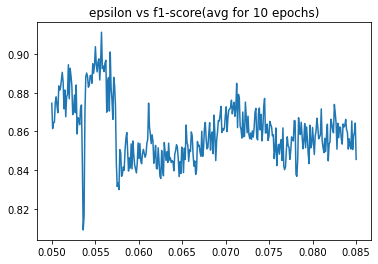

In [5]:
F1s = []
Precs = []
import tqdm
for i in range(len(Xs)):
    X = np.load(os.path.join(files_path, Xs[i]))
    X = X[:, X.shape[1]//2:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    f1s = np.zeros(10)
    prec = np.zeros(10)

    classifier = svm.SVC(kernel='linear')
    for iter in tqdm.tqdm(range(10)):
        # print(f"starting epoch {iter+1}")
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        p = metrics.precision_score(y_test, predicted, pos_label=3)
        f = metrics.f1_score(y_test, predicted, pos_label=3)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
        # print(f"end of epoch {iter+1}")
        f1s[iter] = f
        prec[iter] = p
    # print(f"{0.05 + ((i+1)/10000)} \t {f1s.sum() / f1s.shape[0]} \t {prec.sum() / prec.shape[0]}")
    F1s.append(f1s.sum() / f1s.shape[0])
    Precs.append(prec.sum() / prec.shape[0])


import matplotlib.pyplot as plt
X_axis=np.linspace(0.05, 0.085, len(F1s))
plt.plot(X_axis, F1s)
plt.title("epsilon vs f1-score(avg for 10 epochs)")
F1s = np.array(F1s)
print(f"Maximum f1-score {F1s.max()} at {0.05 + (F1s.argmax()+1)/10000}")


100%|██████████| 10/10 [00:40<00:00,  4.05s/it]


0.050100000000000006 	 0.8431829298464937 	 0.8442365971968201
0.0502 	 0.8627665228998114 	 0.8642826292140947
0.050300000000000004 	 0.8552036571251114 	 0.8397763307423849
0.0504 	 0.8441145027281118 	 0.8377470526058088
0.0505 	 0.8453429699128694 	 0.8426823210720222
0.050600000000000006 	 0.8488905066960403 	 0.8437153015797385
0.0507 	 0.8477673188295265 	 0.8556628373585706
0.050800000000000005 	 0.8472242204771877 	 0.8510667728580852
0.0509 	 0.8481732959662219 	 0.8542701681819966
0.051000000000000004 	 0.8509352254360228 	 0.8312007271573434
0.0511 	 0.8575095098170653 	 0.8687406652478369
0.0512 	 0.8554856612704578 	 0.8519269968976996
0.051300000000000005 	 0.8629108535376181 	 0.8548923144557197
0.0514 	 0.8546594769500946 	 0.8500244398395391
0.051500000000000004 	 0.8612430403447083 	 0.8562484201589177
0.0516 	 0.844965637578278 	 0.8334780114087643
0.0517 	 0.8548742325021825 	 0.8406286018470686
0.051800000000000006 	 0.8675066461061782 	 0.863402207855606
0.0519 	

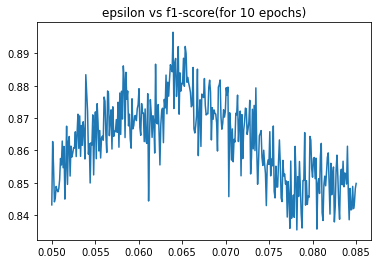

In [28]:
F1s = []
Precs = []
import tqdm
for i in range(len(Xs)):
    X = np.load(os.path.join(files_path, Xs[i]))
    X = X[:, :X.shape[1]//2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    f1s = np.zeros(10)
    prec = np.zeros(10)

    classifier = svm.SVC(kernel='linear')
    for iter in tqdm.tqdm(range(10)):
        # print(f"starting epoch {iter+1}")
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        p = metrics.precision_score(y_test, predicted, pos_label=3)
        f = metrics.f1_score(y_test, predicted, pos_label=3)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
        # print(f"end of epoch {iter+1}")
        f1s[iter] = f
        prec[iter] = p
    print(f"{0.05 + ((i+1)/10000)} \t {f1s.sum() / f1s.shape[0]} \t {prec.sum() / prec.shape[0]}")
    F1s.append(f1s.sum() / f1s.shape[0])
    Precs.append(prec.sum() / prec.shape[0])


import matplotlib.pyplot as plt
X_axis=np.linspace(0.05, 0.085, len(F1s))
plt.plot(X_axis, F1s)
plt.title("epsilon vs f1-score(for 10 epochs)")

print(0.05 + (np.array(F1s).argmax()+1)/10000)

In [ ]:
for j in range(len(Xs_Test)):
        X_Test = np.load(os.path.join(files_path, Xs_Test[j]))
        predicted = classifier.predict(X_Test)


        # print("Classification report for thee classifier: %s\n %s \n" %
        #   (classifier, metrics.classification_report(y_Test, predicted, zero_division=0)))

        # disp = metrics.plot_confusion_matrix(classifier, X_Test, y_Test)

        count = 0
        for k in range(len(predicted)):
            if predicted[k] == 22:
                count += 1
        print(f"Number of Celtic songs in sankarabharanam for train {i/100}, test {j/100} = {count}")

In [3]:
import svm_classifier as svc

path = r"E:\DATASET\audio_CFX"
files = svc.get_inputs(path, ('003', '022'), 'UniSorted', chaos=True)
# f1, prec, acc = svc.classify_svm_linear(path, files, y, thresh=0.499)

20 files found!


In [4]:
import os
from sklearn.model_selection import cross_val_score
path1 = r"E:\DATASET\note_event_dists"
path2 = r"E:\DATASET\pcds"

files1_3 = svc.get_inputs(path1, ('003',), 'ned')
files2_3 = svc.get_inputs(path2, ('003',), 'sorted_Uni')
files1_22 = svc.get_inputs(path1, ('022',), 'ned')
files2_22 = svc.get_inputs(path2, ('022',), 'sorted_Uni')

x1_3 = np.load(os.path.join(path1, files1_3[0]))
x2_3 = np.load(os.path.join(path2, files2_3[0]))
x3 = np.append(x1_3, x2_3, axis=1)
x1_22 = np.load(os.path.join(path1, files1_22[0]))
x2_22 = np.load(os.path.join(path2, files2_22[0]))
x22 = np.append(x1_22, x2_22, axis=1)
x = np.append(x3, x22, axis=0)

clf = svm.SVC(kernel='linear')

scores = cross_val_score(clf, x, y, cv=10)
scores.sum()/len(scores)

1 files found!
1 files found!
1 files found!
1 files found!


0.5406663141195135

## Training on just the note distribution

In [14]:
import os
import svm_classifier as sv
path1 = r"E:\DATASET\note_event_dists"

X_files = sv.get_inputs(path1, ('003', '022'), 'IntDist')
f1, prec, acc = sv.classify_svm_linear(path1, X_files, y, thresh=0.0)

100%|██████████| 10/10 [00:00<00:00, 59.05it/s]


1 files found!
10-fold cross-validattion started for threshold: 0.0 
f1-score: 0.7086279132248436
Max f1 0.7086279132248436 achieved at iteration 0


In [18]:
path1 = r"E:\DATASET\audio_CFX"

X_files = sv.get_inputs(path1, ('003', '022'), 'IntDist', chaos=True)
f1_, prec_, acc_ = sv.classify_svm_linear(path1, X_files, y, thresh=0.499)

100%|██████████| 10/10 [00:00<00:00, 24.61it/s]


200 files found!
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6923808171291984
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6930266572515719
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6815839754511992
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.656624709255132
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6722234262620164
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6845511273755835
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6896142744128422
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6954545133623123
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6793206703668428
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.6866796305757089
10-fold cross-validattion started for threshold: 0.499 
f1-score: 0.714893064395813
10-fold cross-validattion started for threshold: 0

## Invariant features computer using Multiple viewpoints

In [5]:
import svm_classifier as sv
path = r"E:\DATASET\note_events"
X_files = sv.get_inputs(path, ('003', '022'), 'InvEvents')
f1_1, prec_1, acc_1 = sv.classify_svm_linear(path, X_files, y, thresh=2.0)

1 files found!


### Using ChaosFEX(padded)

In [5]:
path = r"E:\DATASET\audio_CFX"
X_files = sv.get_inputs(path, ('003', '022'), 'InvEvents', chaos=True)
f1_c1, prec_c1, acc_c1 = sv.classify_svm_linear(path, X_files, y, thresh=0.25)

100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


20 files found!
10-fold cross-validattion started for file 1 threshold: 0.25 
f1-score: 0.5600442769691701
10-fold cross-validattion started for file 2 threshold: 0.25 
f1-score: 0.564868980492527
10-fold cross-validattion started for file 3 threshold: 0.25 
f1-score: 0.568612522881768
10-fold cross-validattion started for file 4 threshold: 0.25 
f1-score: 0.5552421298225367
10-fold cross-validattion started for file 5 threshold: 0.25 
f1-score: 0.5313041508016514
10-fold cross-validattion started for file 6 threshold: 0.25 
f1-score: 0.5372033635129766
10-fold cross-validattion started for file 7 threshold: 0.25 
f1-score: 0.5447631672329007
10-fold cross-validattion started for file 8 threshold: 0.25 
f1-score: 0.5857363245425484
10-fold cross-validattion started for file 9 threshold: 0.25 
f1-score: 0.5424262183994479
10-fold cross-validattion started for file 10 threshold: 0.25 
f1-score: 0.6337318233997865
10-fold cross-validattion started for file 11 threshold: 0.25 
f1-score: 0.

#### Unpadded

In [6]:
path = r"E:\DATASET\audio_CFX"
X_files = sv.get_inputs(path, ('003', '022'), 'InvEventsUnPadded', chaos=True)
f1_c2, prec_c2, acc_c2 = sv.classify_svm_linear(path, X_files, y, thresh=0.25)


100%|██████████| 10/10 [00:25<00:00,  2.56s/it]


20 files found!
10-fold cross-validattion started for file 1 threshold: 0.25 
f1-score: 0.5656968095155951
10-fold cross-validattion started for file 2 threshold: 0.25 
f1-score: 0.6071016114754852
10-fold cross-validattion started for file 3 threshold: 0.25 
f1-score: 0.587260570453403
10-fold cross-validattion started for file 4 threshold: 0.25 
f1-score: 0.5251896988565548
10-fold cross-validattion started for file 5 threshold: 0.25 
f1-score: 0.5352083106959004
10-fold cross-validattion started for file 6 threshold: 0.25 
f1-score: 0.5611282047704289
10-fold cross-validattion started for file 7 threshold: 0.25 
f1-score: 0.5922914574187367
10-fold cross-validattion started for file 8 threshold: 0.25 
f1-score: 0.605211404920658
10-fold cross-validattion started for file 9 threshold: 0.25 
f1-score: 0.6271798696198853
10-fold cross-validattion started for file 10 threshold: 0.25 
f1-score: 0.6329799885108296
10-fold cross-validattion started for file 11 threshold: 0.25 
f1-score: 0.

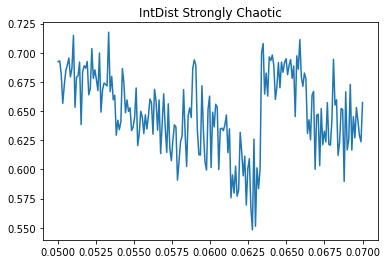

In [20]:
from plotter import plot_dirty

eps = np.linspace(0.05, 0.07, len(X_files))
plot_dirty(eps, f1_, 'IntDist Strongly Chaotic')

## Training on augmented pitches (with ChaosFEX)

In [11]:
path1 = r"E:\DATASET\audio_CFX"

X_files = sv.get_inputs(path1, ('003', '022'), 'Pitches', chaos=True)

20 files found! 


for saving the above model

In [12]:
X_files = [X_files[9]]
f1_, prec_, acc_ = sv.classify_svm_linear(path1, X_files, y, thresh=0.499)

100%|██████████| 10/10 [10:04<00:00, 60.49s/it]


10-fold cross-validattion started for file 1 threshold: 0.499 
f1-score: 0.836771636943024
saving the model to E:\DATASET\models\Pitches_003_022_CFXthres49925eps59.joblib
Max f1 0.836771636943024 achieved at iteration 0


In [4]:
import svm_classifier as sv
path1 = r"E:\DATASET\audio_CFX"

X_files = sv.get_inputs(path1, ('003', '022'), 'Pitches', chaos=True)
f1_, prec_, acc_ = sv.classify_svm_linear(path1, X_files, y, thresh=0.25)


20 files found!
10-fold cross-validattion started for file 1 threshold: 0.25 
f1-score: 0.7724266628242866
saving the model to E:\DATASET\models\Pitches_003_022_CFXthres49925eps50.joblib
10-fold cross-validattion started for file 2 threshold: 0.25 
f1-score: 0.7814177762527055
saving the model to E:\DATASET\models\Pitches_003_022_CFXthres49925eps51.joblib
10-fold cross-validattion started for file 3 threshold: 0.25 
f1-score: 0.7748861860647125
saving the model to E:\DATASET\models\Pitches_003_022_CFXthres49925eps52.joblib
10-fold cross-validattion started for file 4 threshold: 0.25 
f1-score: 0.7769850064171806
saving the model to E:\DATASET\models\Pitches_003_022_CFXthres49925eps53.joblib
10-fold cross-validattion started for file 5 threshold: 0.25 
f1-score: 0.8248537703554314
saving the model to E:\DATASET\models\Pitches_003_022_CFXthres49925eps54.joblib
10-fold cross-validattion started for file 6 threshold: 0.25 
f1-score: 0.8250312393853692
saving the model to E:\DATASET\models\

100%|██████████| 10/10 [09:25<00:00, 56.54s/it]


## Training augmented pitches

In [10]:
import svm_classifier as sv
patth = r"E:\DATASET\dom_scale_inv"
x_files1 = sv.get_inputs(patth, ('003', ), 'pitches')
x_files2 = sv.get_inputs(patth, ('022', ), 'pitches')
X_files = x_files1 + x_files2
f1, prec, acc = sv.classify_svm_linear(patth, X_files, y, thresh=0.0)

1 files found! 
1 files found! 
flattening the input shape (324, 12, 2585), (290, 12, 2585)
flatteining done! new shape: (324, 31020), (290, 31020)
10-fold cross-validation started
f1-score: 0.836867230922231
saving the model to E:\DATASET\models\pitches_003.joblib
Max f1 0.836867230922231 achieved at iteration 0


100%|██████████| 10/10 [02:07<00:00, 12.71s/it]


In [10]:
import numpy as np
import svm_classifier as sv
path = r"E:\DATASET\audio_CFX"
x_files = sv.get_inputs(path, ('003', '022'), 'pcdUni', chaos=True)
y = np.load(r"E:/DATASET/003_022_Y.npy")
f1s, precs, accs = sv.classify_svm_linear(path, x_files, y, thresh=0.499)

100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


200 files found! 
10-fold cross-validattion started for file 1 threshold: 0.499 
f1-score: 0.8901128412567513
10-fold cross-validattion started for file 2 threshold: 0.499 
f1-score: 0.8843751267363091
10-fold cross-validattion started for file 3 threshold: 0.499 
f1-score: 0.8957628935387556
10-fold cross-validattion started for file 4 threshold: 0.499 
f1-score: 0.8986530653053604
10-fold cross-validattion started for file 5 threshold: 0.499 
f1-score: 0.867270843903819
10-fold cross-validattion started for file 6 threshold: 0.499 
f1-score: 0.8817063101809021
10-fold cross-validattion started for file 7 threshold: 0.499 
f1-score: 0.8944847324600846
10-fold cross-validattion started for file 8 threshold: 0.499 
f1-score: 0.8747867213887656
10-fold cross-validattion started for file 9 threshold: 0.499 
f1-score: 0.899813756394791
10-fold cross-validattion started for file 10 threshold: 0.499 
f1-score: 0.8839984673465651
10-fold cross-validattion started for file 11 threshold: 0.499 